### Kaggle Red Wine Quality 군집화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
rw = pd.read_csv('../03.분류/data/winequality-red.csv')
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(rw.shape)
print(rw.quality.value_counts().sort_index())

(1599, 12)
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler
X = rw.iloc[:, :-1].values
X_std = StandardScaler().fit_transform(X)

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from visualize import visualize_silhouette

In [7]:
kmeans = KMeans(2, random_state=2023)
kmeans.fit(X_std)
rw['cluster'] = kmeans.labels_
rw.groupby(['quality','cluster'])[['alcohol']].count()

alcohol
quality cluster         
3       0              7
        1              3
4       0             43
        1             10
5       0            497
        1            184
6       0            388
        1            250
7       0             69
        1            130
8       0              7
        1             11

In [8]:
silhouette_score(X_std, kmeans.labels_)

0.21394174587816794

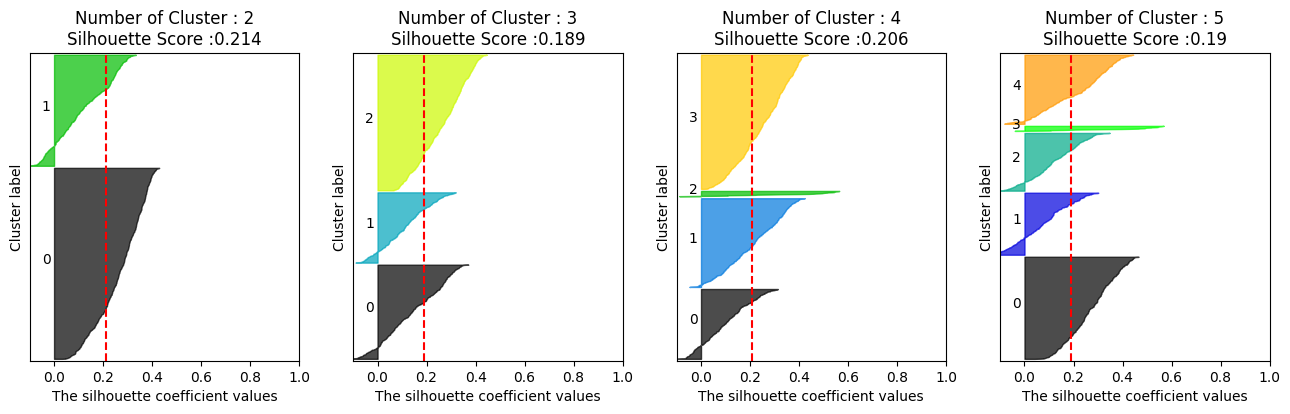

In [9]:
visualize_silhouette([2,3,4,5], X_std)